# Разведывательный анализ данных 
## Цель и задачи проекта.
Цель проекта - проведение разведывательного анализа данных, выделение параметров влияющих на баллы по госэкзамену по математике.

Задачи - пранализировать данные, определить число пропусков, выбросов, проанализировать значения параметров, отобрать переменные для модели.


## Описание датасета.
Датасет содержит следующие поля:

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

## Выполнение

### Загрузка, просмотр данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

df = pd.read_csv('../input/m2_stud_math/stud_math.csv')

In [2]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


В исходном датасете имеется 30 полей и 395 строк.

### Переименование колонок
Для удобства переименуем "studytime, granular" в "studytime_granular".

In [3]:
df.columns = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
    'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
    'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
    'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
    'freetime', 'goout', 'health', 'absences', 'score'
]

### Разделение числовых и номинативных переменных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   Pstatus             350 non-null    object 
 6   Medu                392 non-null    float64
 7   Fedu                371 non-null    float64
 8   Mjob                376 non-null    object 
 9   Fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

Колличественные переменные в датасете:
- age
- absences
- score

Номинальные переменные:
- school
- sex
- address
- famsize
- Pstatus
- Mjob
- Fjob
- reason
- guardian
- schoolsup
- famsup
- paid
- activities
- nursery
- higher
- internet
- romantic

Ранговые переменные:
- Medu
- Fedu
- traveltime
- studytime
- failures
- famrel
- freetime
- goout
- health
- studytime_granular (предположительно)



### Оценка наполненности полей

In [5]:
df_info = pd.DataFrame(df.count(), columns=['not_null_count'])
df_info['is_null'] = df.isnull().sum()
df_info['not_null_ratio'] = df_info['not_null_count'] / len(df)
df_info['nunique'] = df.nunique()
df_info

,not_null_count,is_null,not_null_ratio,nunique
school,395,0,1.000000,2
sex,395,0,1.000000,2
age,395,0,1.000000,8
address,378,17,0.956962,2
famsize,368,27,0.931646,2
Pstatus,350,45,0.886076,2
Medu,392,3,0.992405,5
Fedu,371,24,0.939241,6
Mjob,376,19,0.951899,5
Fjob,359,36,0.908861,5


Несмотря на наличие пропусков, данные имеют высокую наполненность. Минимальное количество заполненных значений для поля ~90%.

### Оценка значений полей данных

#### Оценка уникальных значений

In [6]:
def value_counts(s):
    display(pd.DataFrame(s.value_counts()))


def value_counts_wna(s):
    display(pd.DataFrame(s.value_counts(dropna=False)))

In [7]:
for c in df.columns:
    value_counts_wna(df[c])

,school
GP,349
MS,46


,sex
F,208
M,187


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


,address
U,295
R,83
NaN,17


,famsize
GT3,261
LE3,107
NaN,27


,Pstatus
T,314
NaN,45
A,36


,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3
NaN,3


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
NaN,24
0.0,2
40.0,1


,Mjob
other,133
services,98
at_home,58
teacher,55
health,32
NaN,19


,Fjob
other,197
services,102
NaN,36
teacher,29
at_home,16
health,15


,reason
course,137
home,104
reputation,103
other,34
NaN,17


,guardian
mother,250
father,86
NaN,31
other,28


,traveltime
1.0,242
2.0,96
NaN,28
3.0,22
4.0,7


,studytime
2.0,194
1.0,103
3.0,64
4.0,27
NaN,7


,failures
0.0,293
1.0,49
NaN,22
2.0,16
3.0,15


,schoolsup
no,335
yes,51
NaN,9


,famsup
yes,219
no,137
NaN,39


,paid
no,200
yes,155
NaN,40


,activities
yes,195
no,186
NaN,14


,nursery
yes,300
no,79
NaN,16


,studytime_granular
-6.0,194
-3.0,103
-9.0,64
-12.0,27
NaN,7


,higher
yes,356
NaN,20
no,19


,internet
yes,305
no,56
NaN,34


,romantic
no,240
yes,124
NaN,31


,famrel
4.0,182
5.0,99
3.0,62
NaN,27
2.0,17
1.0,7
-1.0,1


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18
NaN,11


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23
NaN,8


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43
NaN,15


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
NaN,12
14.0,12
3.0,8


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
45.0,27
70.0,27
80.0,16


Категоральные поля имеют малый набор уникальных значений, многие являются бинарными. Числовые поля также имеют небольшой набор значений, либо имеют сгруппированные значения.

#### Оценка соответствия данных описанию.

Поля имеющие несоответствия значений описанию:
* famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
    имеет значение "-1" (1 раз). Можно предложить исправить на "1" (предполагая опечатку) или удалить,
    
* failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)
    имеет "3" (15 раз). Можно предложить 
    исправить на "0"
    или удалить,
    
* Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
    имеет 40.0 (1 раз). Можно предложить
    исправить на 4
    или удалить.
    
Значения остальных полей соответствуют описанию.

In [8]:
df_original = df.copy(deep=True)

Создадим копию дата сет и удалим из нее предложенные значения.

In [9]:
df = df[df['famrel'] > -1]
df = df[df['failures'] < 3]
df = df[df['Fedu'] < 5]

(len(df_original) - len(df)) / len(df_original)

0.21265822784810126

Под описанный критерий попадает 84 строки (21%), что достаточно много.

### Анализ значений переменных.
#### Количественные переменные.
##### score

Переменная score является переменной, которая будет предсказыватся. 

In [10]:
df.score.describe()

count    306.000000
mean      53.267974
std       21.974801
min        0.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

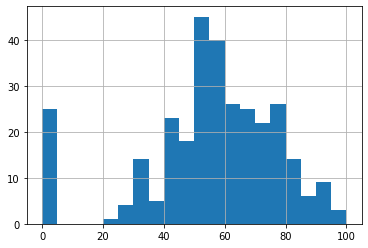

In [11]:
df.score.hist(bins=20)

In [12]:
def outliers_info(df, column):
    median = df[column].median()
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    perc25 = df[column].quantile(0.25)
    perc75 = df[column].quantile(0.75)
    print("Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5 * IQR,
                                                 l=perc75 + 1.5 * IQR))

In [13]:
outliers_info(df, 'score')

Границы выбросов: [7.5, 107.5].


Для переменной score предположительно использованна шкала [0,100], есть выброс в значении "0".

Выделяются две разделенных диапазона данных:
1. всплеск со значением "0" (10% данных). При удалении ошибок в данных из famrel, failures, Fedu это значение снизилось c 10% до 8%.
2. распределение в диапазоне [20, 100].

Предлагается:
1. использовать данные в диапозоне [20, 100] не содержащем выбросов.
2. дополнительно проанализировать значимость изначального распределения - двух четко разграниченных групп данных, если нам важнен вопрос равенства 0 значения score. При условии, что значение 0 является значимым, а не ошибкой или признаком отсутствия данных.

После удаления данных о выбросе распределение имеет следующий вид:

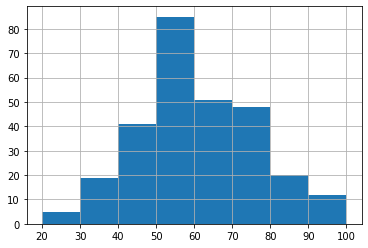

In [14]:
df = df[df.score > 0]
df['score'].hist(bins=8)

In [15]:
df.score.describe()

count    281.000000
mean      58.007117
std       15.815226
min       20.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

##### age

Распределение для изначального датасета:

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

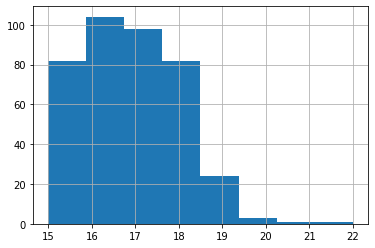

In [16]:
df_original.age.hist(bins=8)
df_original.age.describe()

In [17]:
outliers_info(df_original, 'age')

Границы выбросов: [13.0, 21.0].


Имеется возможный выброс age > 21.

Распределение для очищенной версии датасета на шаге 3.5.2:

count    281.000000
mean      16.654804
std        1.185502
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       20.000000
Name: age, dtype: float64

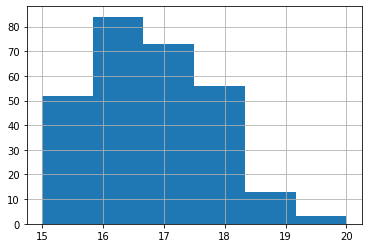

In [18]:
df.age.hist(bins=6)
df.age.describe()

In [19]:
outliers_info(df, 'age')

Границы выбросов: [13.0, 21.0].


В очищенном датасете выбросов не наблюдается. Возможный выброс убран на шаге 3.5.2.

##### absences

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

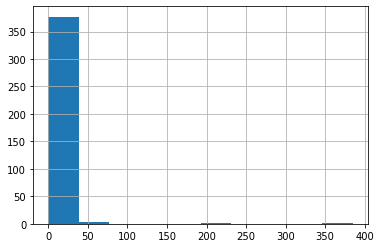

In [20]:
df_original.absences.hist()
df_original.absences.describe()

In [21]:
outliers_info(df_original, 'absences')

Границы выбросов: [-12.0, 20.0].


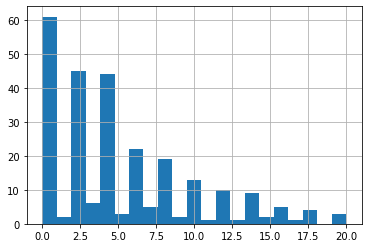

In [22]:
df.absences[df.absences <= 20].hist(bins=21)

В данных присутствуют выбросы. Предлагается оставить значения в интервале [0, 20]

In [23]:
df = df[df.absences <= 20]

In [24]:
(len(df_original) - len(df)) / len(df_original)

0.3468354430379747

Если принять все предложения по очистке данных, то будет удалено ~35% строк от исходного датасета.

##### Корреляционный анализ.

In [25]:
cols_num = ['age', 'absences', 'score']

In [26]:
df[cols_num].corr()

,age,absences,score
age,1.000000,0.178727,-0.087174
absences,0.178727,1.000000,-0.180342
score,-0.087174,-0.180342,1.000000


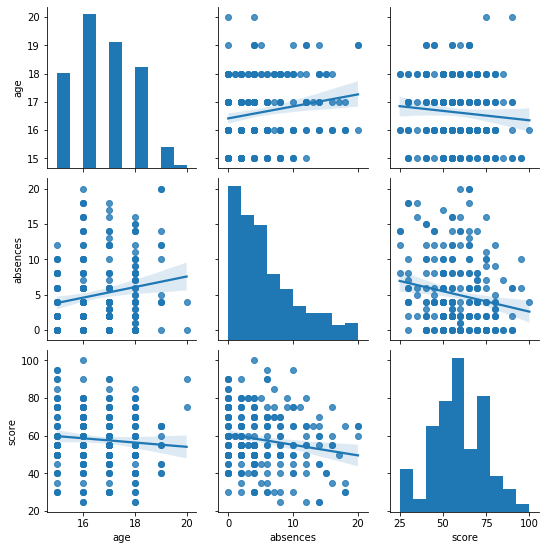

In [27]:
sns.pairplot(df[cols_num], kind='reg')

Среди количественных переменных нет линейнозависимых. Предлагается оставить их для дальнейшего построения модели.

#### Ранговые переменные.

In [28]:
cols_rank = [
    'Medu', 'Fedu', 'traveltime', 'studytime', 'studytime_granular',
    'failures', 'famrel', 'freetime', 'goout', 'health'
]

In [29]:
df[cols_rank].corr(method='spearman')

,Medu,Fedu,traveltime,studytime,studytime_granular,failures,famrel,freetime,goout,health
Medu,1.000000,0.622536,-0.143526,0.083495,-0.083495,-0.118365,0.036938,0.007838,0.067646,-0.057937
Fedu,0.622536,1.000000,-0.159437,-0.018890,0.018890,-0.183958,0.012937,0.000266,0.023245,0.011922
traveltime,-0.143526,-0.159437,1.000000,-0.139697,0.139697,0.073528,-0.052453,0.034248,-0.075185,0.021521
studytime,0.083495,-0.018890,-0.139697,1.000000,-1.000000,-0.046115,0.113323,-0.103480,-0.046700,-0.151351
studytime_granular,-0.083495,0.018890,0.139697,-1.000000,1.000000,0.046115,-0.113323,0.103480,0.046700,0.151351
failures,-0.118365,-0.183958,0.073528,-0.046115,0.046115,1.000000,-0.015029,0.112050,0.069819,0.117452
famrel,0.036938,0.012937,-0.052453,0.113323,-0.113323,-0.015029,1.000000,0.145760,0.013329,0.073808
freetime,0.007838,0.000266,0.034248,-0.103480,0.103480,0.112050,0.145760,1.000000,0.267974,0.108635
goout,0.067646,0.023245,-0.075185,-0.046700,0.046700,0.069819,0.013329,0.267974,1.000000,0.007254
health,-0.057937,0.011922,0.021521,-0.151351,0.151351,0.117452,0.073808,0.108635,0.007254,1.000000


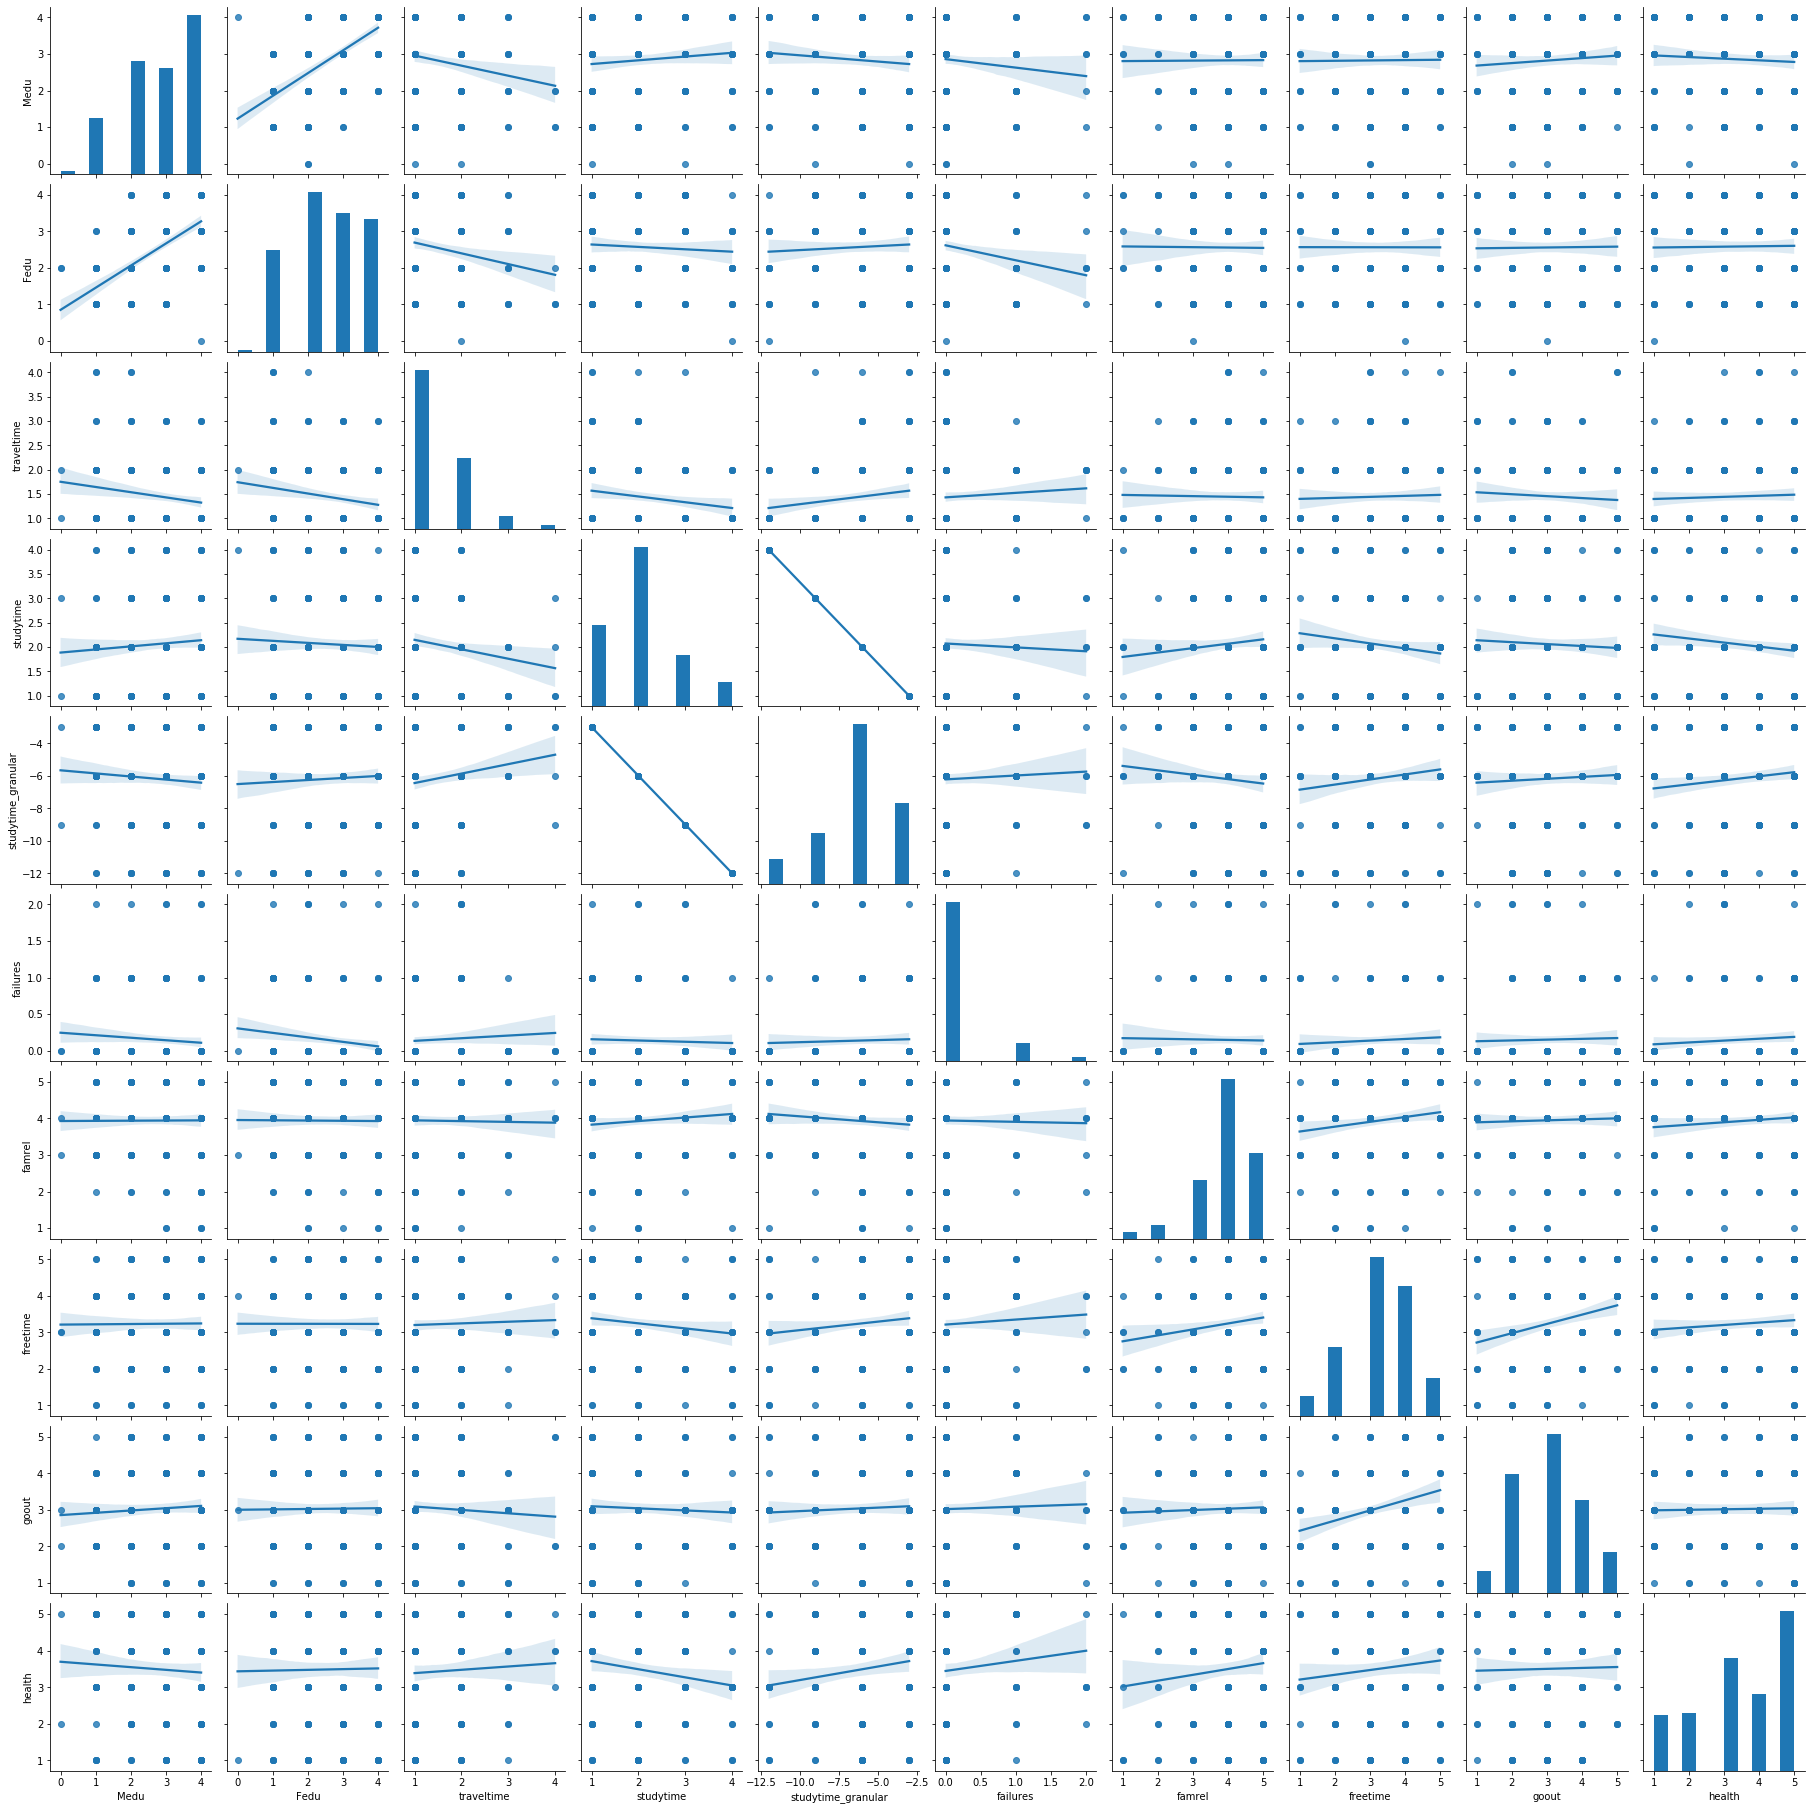

In [30]:
sns.pairplot(df[cols_rank], kind='reg')

Наблюдается некоторая взаимосвязь между уровнем образования родителей.

Переменные studytime, studytime_granular линейно зависимы.
Предлагается отказаться от одиного из них:

In [31]:
df.drop('studytime_granular', axis=1, inplace=True)

#### Номинальные переменные

In [32]:
cols_qual = [
    'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
    'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
    'higher', 'internet', 'romantic'
]

Построим распределения баллов в зависимости от значения номинальных переменных.

In [33]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score', data=df, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

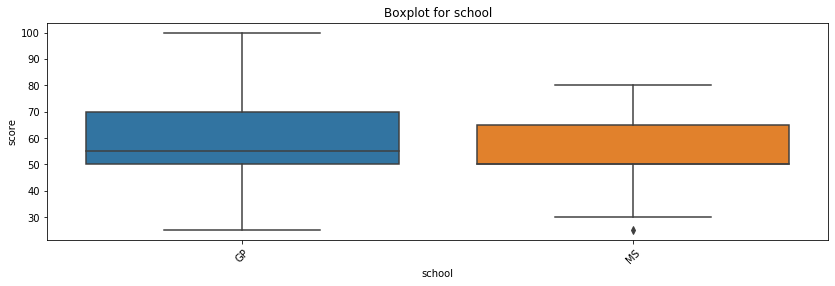

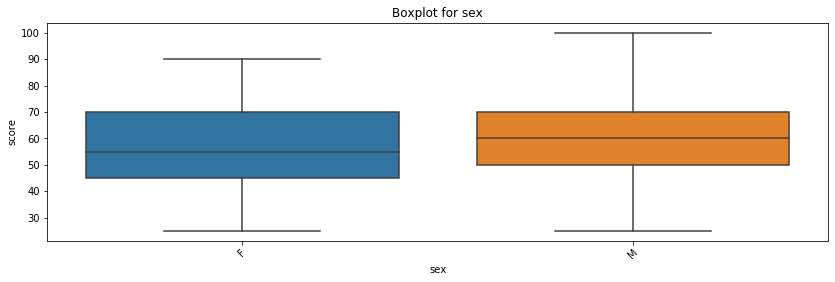

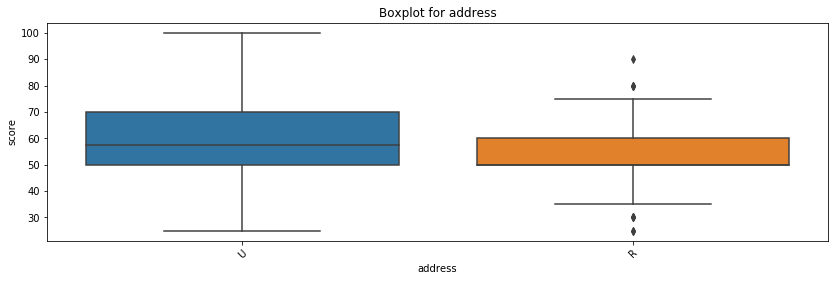

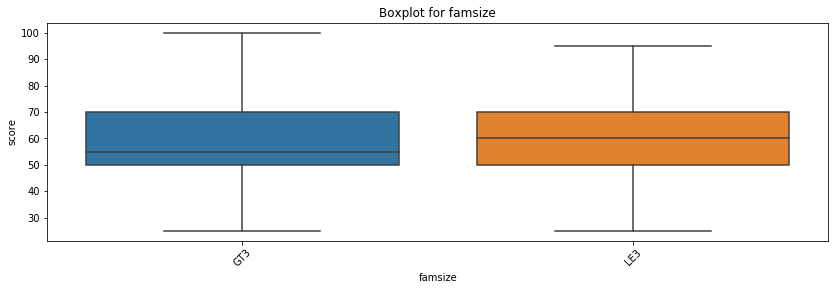

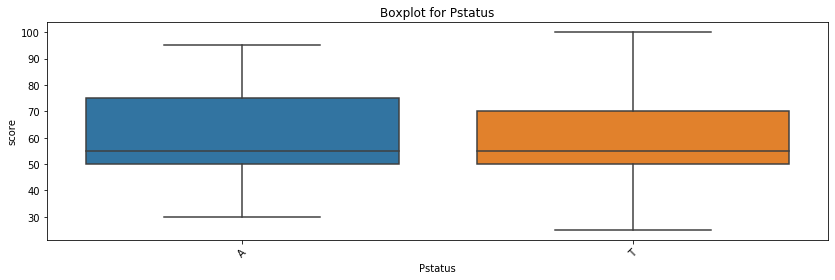

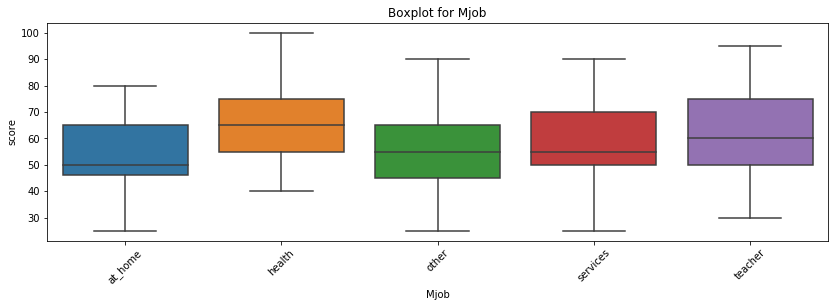

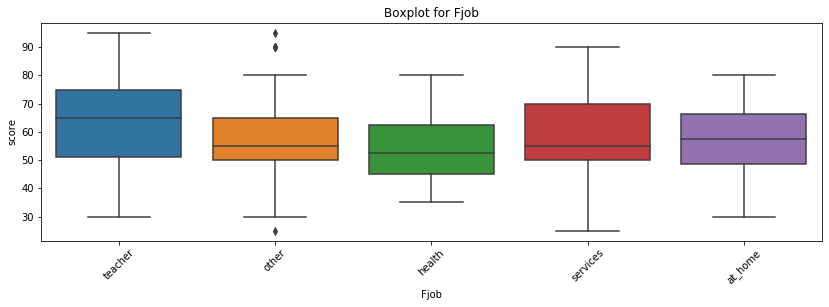

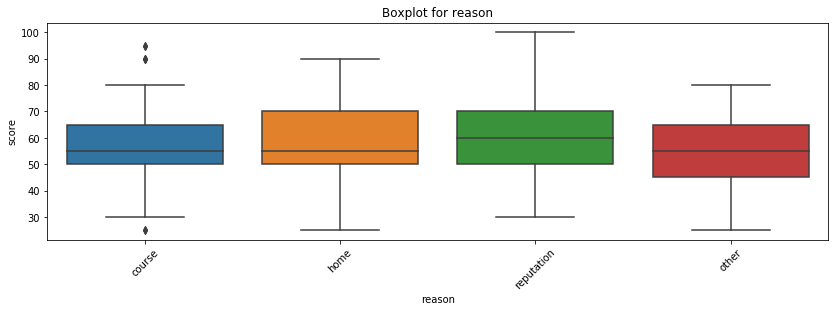

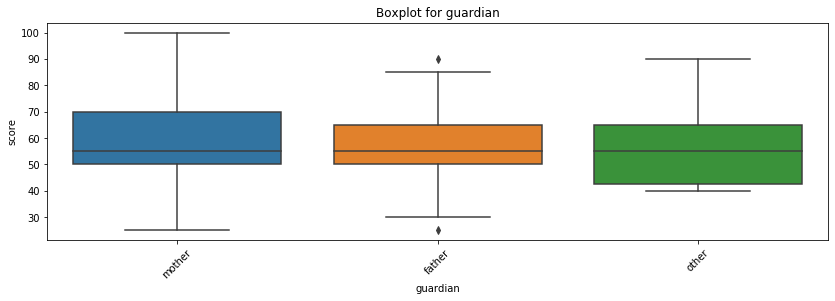

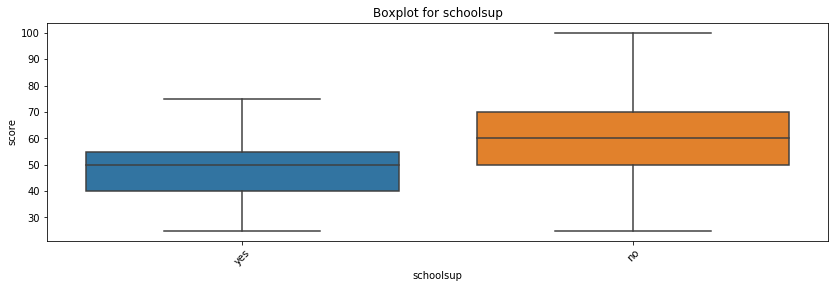

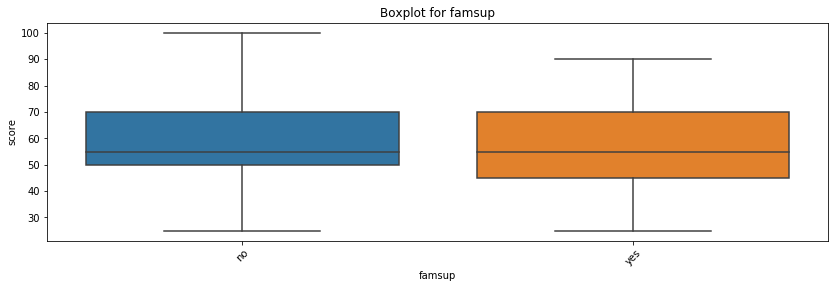

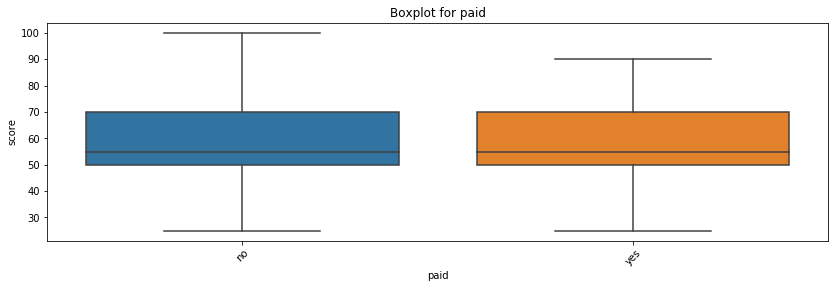

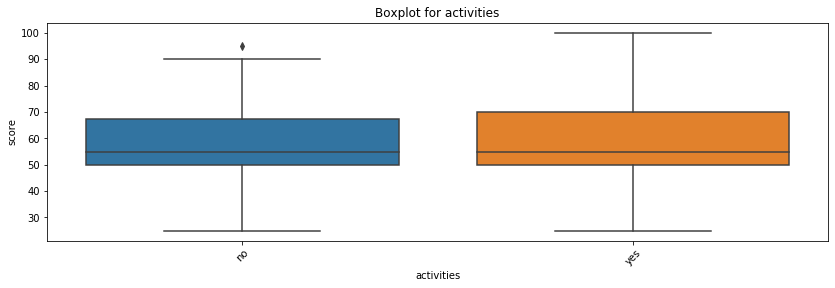

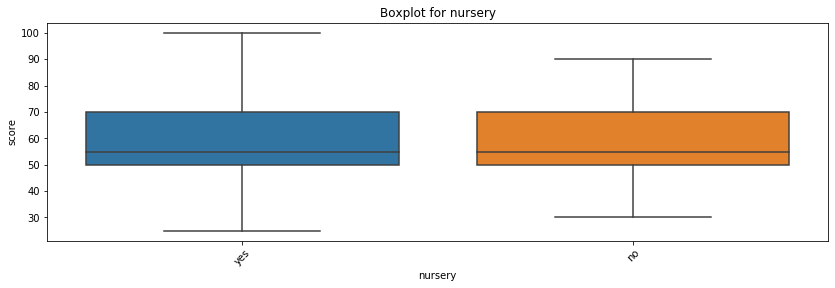

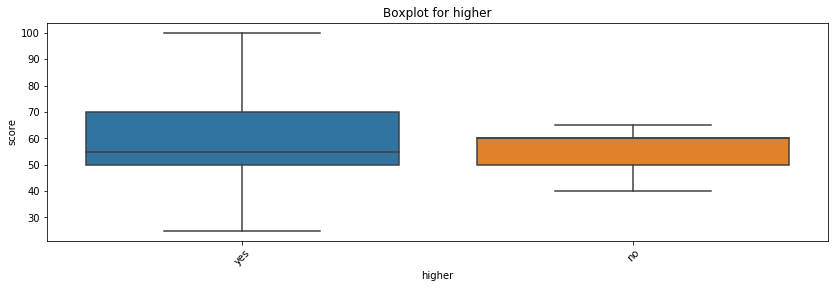

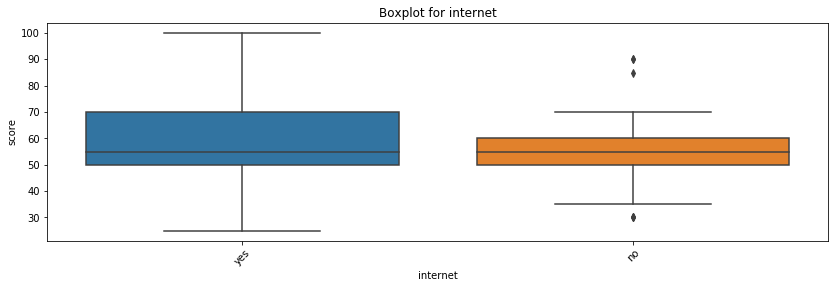

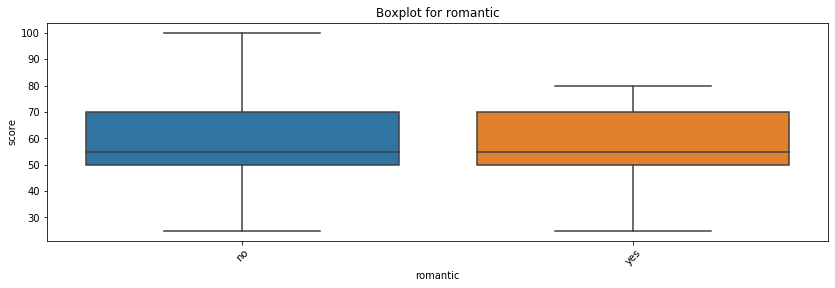

In [34]:
for col in cols_qual:
    get_boxplot(col)

Исходя из графиков, можно предположить, что, возможно, Pstatus, Fjob,
guardian, famsup, paid, activities, nursery, internet, romantic не влияют на распределения баллов.


С помощью теста Стьюдента проверим нулевую гипотезу о том, что распределения баллов по различным значениеям каждого номинативного параметра неразличимы:

In [35]:
def get_stat_dif(column, dataframe):
    cols = dataframe.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(dataframe.loc[dataframe.loc[:, column] == comb[0], 'score'],
                     dataframe.loc[dataframe.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            return True
    return False

In [36]:
col_diff = []
for col in cols_qual:
    if get_stat_dif(col, df):
        col_diff.append(col)

In [37]:
print(col_diff)

['sex', 'address', 'Mjob', 'schoolsup']


Наиболее значимыми на основании теста Стьюдента являются:
- sex,
- address,
- Mjob,
- schoolsup.

## Выводы

Итак, в результате EDA для анализа влияния параметров на баллы по госэкзамену по математике были получены следующие выводы:

1. В данных достаточно мало пустых значений.

2. Есть данные не соответствующие описанию в: famrel, failures, Fedu. Найдены выбросы в: score, age, absences. В сумме - это 35% строк. Присутсвует параметр, отсутствующий в описании, имеющий кореляцию с одним из параметров. Данные достаточно загрезненные.

3. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это
  - age
  - absences
  - score
  - Medu
  - Fedu
  - traveltime
  - studytime
  - failures
  - famrel
  - freetime
  - goout
  - health
  - sex
  - address
  - Mjob
  - schoolsup.
